## Лабораторная работа 1

#### Задание 1

Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
frame = pd.read_csv('data.csv', sep=';', encoding='cp1252')
predictors = ['cap-diameter', 'stem-height']
outcome = 'class'
frame

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


Подготовка данных для тестирования

In [3]:
frame.isnull().sum()
frame = frame.astype({
                      'class' : 'category',
                      'cap-shape' : 'category',
                      'cap-diameter' : 'float16',
                      'cap-surface' : 'category',
                      'cap-color' : 'category',
                      'does-bruise-or-bleed' : 'category',
                      'gill-attachment' : 'category',
                      'gill-spacing' : 'category',
                      'gill-color' : 'category',
                      'stem-height' : 'float16',
                      'stem-width' : 'float16',
                      'stem-root' : 'category',
                      'stem-surface' : 'category',
                      'stem-color' : 'category',
                      'veil-type' : 'category',
                      'veil-color' : 'category',
                      'has-ring' : 'category',
                      'ring-type' : 'category',
                      'spore-print-color' : 'category',
                      'habitat' : 'category',
                      'season' : 'category'
                      })
frame.dtypes

class                   category
cap-diameter             float16
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float16
stem-width               float16
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object

In [4]:
encoder = LabelEncoder()
for column in frame.columns:
    if frame[column].dtype == 'category':
        frame[column] = encoder.fit_transform(frame[column])

frame.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.257812,6,2,6,0,2,3,10,16.953125,...,4,7,11,0,4,1,2,7,0,3
1,1,16.593750,6,2,6,0,2,3,10,17.984375,...,4,7,11,0,4,1,2,7,0,2
2,1,14.070312,6,2,6,0,2,3,10,17.796875,...,4,7,11,0,4,1,2,7,0,3
3,1,14.171875,2,3,1,0,2,3,10,15.773438,...,4,7,11,0,4,1,5,7,0,3
4,1,14.640625,6,3,6,0,2,3,10,16.531250,...,4,7,11,0,4,1,5,7,0,3


 Разделим датасет на обучающую выборку и тестовую выборку. Обучающая выборка будет использоваться для обучения модели, а тестовая выборка - для оценки ее точности

 20% данных будет использоваться для тестирования моделей

In [5]:
y = frame['class'].values
x = frame.drop(['class'], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Задание 2

Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from math import sqrt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

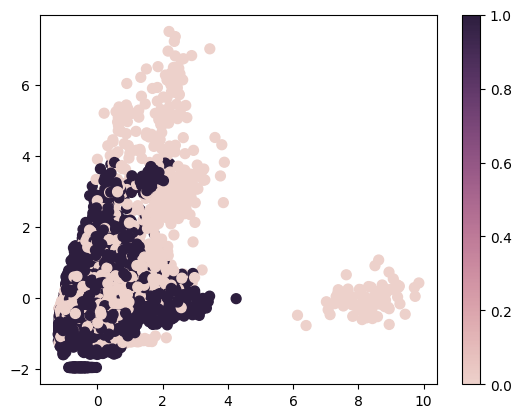

In [7]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test[:, 0], x_test[:, 8], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

**Подбор гиперпараметров и наилучшего k**

In [8]:
param_grid = {'n_neighbors': range(1, 20),
               'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

Чтобы найти лучшее значение для k, будем использовать инструмент под названием GridSearchCV. Это инструмент, который часто используется для настройки гиперпараметров моделей машинного обучения. В вашем случае это поможет автоматически найти наилучшее значение k для набора данных.

In [9]:
gridsearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

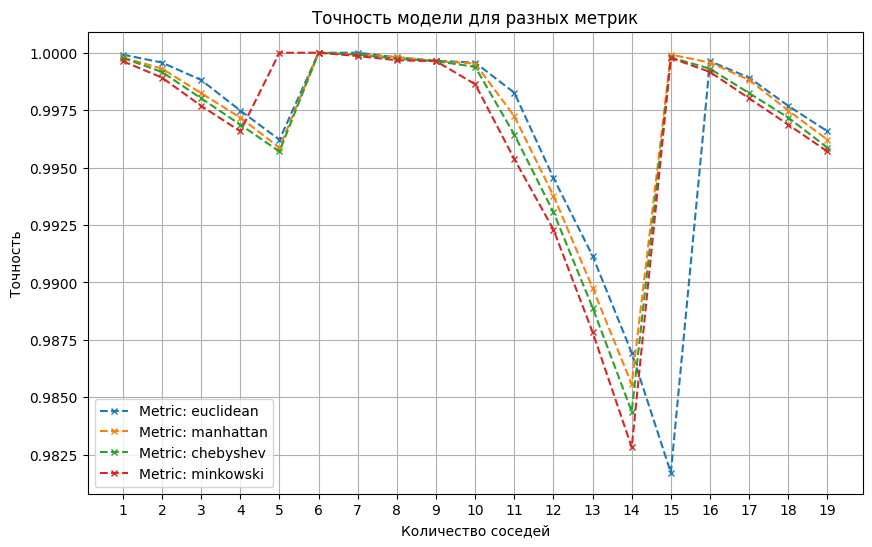

In [10]:
best_metric = gridsearch.best_params_['metric']
best_k = gridsearch.best_params_['n_neighbors']

accuracies = gridsearch.cv_results_['mean_test_score']
accuracies = np.array(accuracies).reshape(len(param_grid['n_neighbors']), len(param_grid['metric']))

plt.figure(figsize=(10, 6))

for i, metric in enumerate(param_grid['metric']):
    plt.plot(param_grid['n_neighbors'], accuracies[:, i], marker='x', linestyle='dashed', markersize=4,
             label=f'Metric: {metric}')

plt.title('Точность модели для разных метрик')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.xticks(range(1, 20))
plt.legend()
plt.grid(True)
plt.show()

In [13]:
model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

report = classification_report(y_test, y_pred, zero_division=1)
print(f'Отчет о классификации : \n{report}')

Точность модели: 1.0
Отчет о классификации : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



**Метод k-ближайших соседей – это простой алгоритм машинного обучения с учителем, который можно использовать для решения задач классификации и регрессии. Он прост в реализации и понимании, но имеет существенный недостаток – значительное замедление работы, когда объем данных растет.**

## Лабораторная работа 2

#### Задание 1

Провести классификацию найденного датасета, методом машины опорных векторов. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [22]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Метод опорных векторов (МОВ) — это техника машинного обучения с учителем. Она используется в классификации, может быть применена к регрессионным задачам.

Метод определяет границу принятия решения (ГПР) вместе с максимальным зазором, который разделяет почти все точки на два класса, оставляя место для неправильной классификации.

Цель МОВ — определить гиперплоскость (также называется “разделяющей” или “ГПР”), которая разделяет точки на два класса.

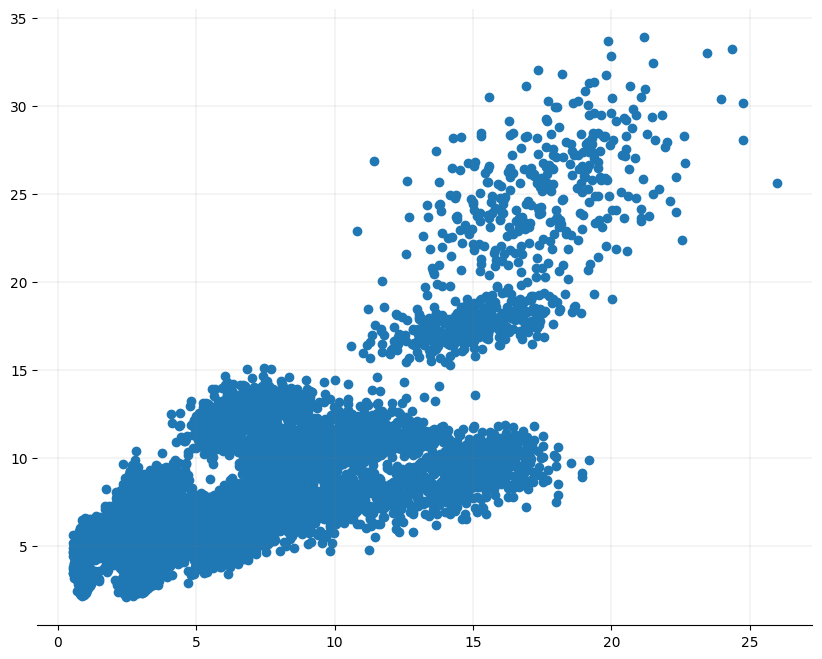

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(frame[:len(x_test)]['cap-diameter'], frame[:len(x_test)]['stem-height'])
plt.show()

**Гиперпараметры**

**C (регуляризация)** : Определяет силу регуляризации в модели SVM (Support Vector Machine / Машина опорных векторов); более низкое значение C увеличивает штраф за неправильную классификацию, что может привести к созданию простой модели с большей обобщающей способностью.

**gamma (ядерный коэффициент)** : Определяет влияние одного тренировочного примера на другие; меньшие значения gamma означают более широкие гауссовы функции и приводят к более простым/прямым границам решения.

**kernel (ядро)** : Определяет тип использованного ядра (линейное или RBF); линейное ядро работает линейно, тогда как RBF (радиально-базисная функция) способно моделировать сложные границы решений.

In [18]:
param_grid = {'C': [0.01, 0.1, 1], 
              'kernel': ['linear', 'rbf', 'sigmoid'],
                'gamma': [0.1, 1, 10]}

##### Перекрестная проверка гиперпараметров

In [19]:
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
best_params = {'kernel': grid.best_params_['kernel'],
               'C': grid.best_params_['C'],
               'gamma': grid.best_params_['gamma']}

model = svm.SVC(**best_params) 
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

report = classification_report(y_test, y_pred, zero_division=1)
print(report)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, x_train, y_train, cv=stratified_kfold)

print(f'Средняя точность перекрестной проверки: {cross_val_scores.mean()}')

Точность модели: 0.9998362534796136
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Средняя точность перекрестной проверки: 0.9997748439259031


Классификаторы SVM обеспечивают хорошую точность и выполняют более быстрое прогнозирование. Они также используют меньше памяти, поскольку на этапе принятия решения используют подмножество тренировочных точек. SVM хорошо работает с четким запасом разделения и с пространством большой размерности.

SVM не подходит для больших наборов данных из-за большого времени обучения. Он плохо работает с перекрывающимися классами, а также чувствителен к типу используемого ядра.

## Лабораторная работа 3

#### Задание 1

Провести классификацию найденного датасета, методами линеной и логистической регрессий . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

##### Линейная регрессия

**Линейная регрессия** – одна из важнейших и широко используемых техник регрессии. Эта самый простой метод регрессии. Одним из его достоинств является лёгкость интерпретации результатов.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
grid_param = {'fit_intercept': [True, False]}

In [26]:
grid = GridSearchCV(LinearRegression(), grid_param, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'fit_intercept': True}

In [27]:
best_fit = grid.best_params_['fit_intercept']
model = LinearRegression(fit_intercept=best_fit)
model.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R^2: ", r2)

MAE:  0.43959386612180995
MSE:  0.2177016476007951
R^2:  0.11646494870130308


##### Логистическая регрессия

**Логистическая регрессия** - это статистический метод анализа набора данных, в котором есть одна или несколько независимых переменных, определяющих результат. Результат измеряется с помощью дихотомической переменной (в которой есть только два возможных результата)

**Гиперпараметры :**

**C:** обратная сила регуляризации. Меньшие значения C указывают на более сильную регуляризацию. 

**penalty:** задает тип регуляризации (например, L1 или L2). 

**solver:** алгоритм, используемый для оптимизации весов (например, 'liblinear', 'saga', 'lbfgs' и другие).

In [32]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

##### Перекрестная проверка гиперпараметров

In [33]:
logistic = LogisticRegression(max_iter=1000)
grid = GridSearchCV(logistic, param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-pack

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [34]:
best_params = {'multi_class': 'auto',
                'max_iter': 1000,
                'solver': grid.best_params_['solver'],
                'C': grid.best_params_['C'],
                'penalty': grid.best_params_['penalty']}

model = LogisticRegression(**best_params)
model.fit(x_train, y_train)

logistic_predictions = model.predict(x_test)
report = classification_report(y_test, logistic_predictions)
print(report)

logistic_probabilities = model.predict_proba(x_test)

              precision    recall  f1-score   support

           0       0.63      0.53      0.58      5374
           1       0.67      0.76      0.71      6840

    accuracy                           0.66     12214
   macro avg       0.65      0.64      0.64     12214
weighted avg       0.65      0.66      0.65     12214



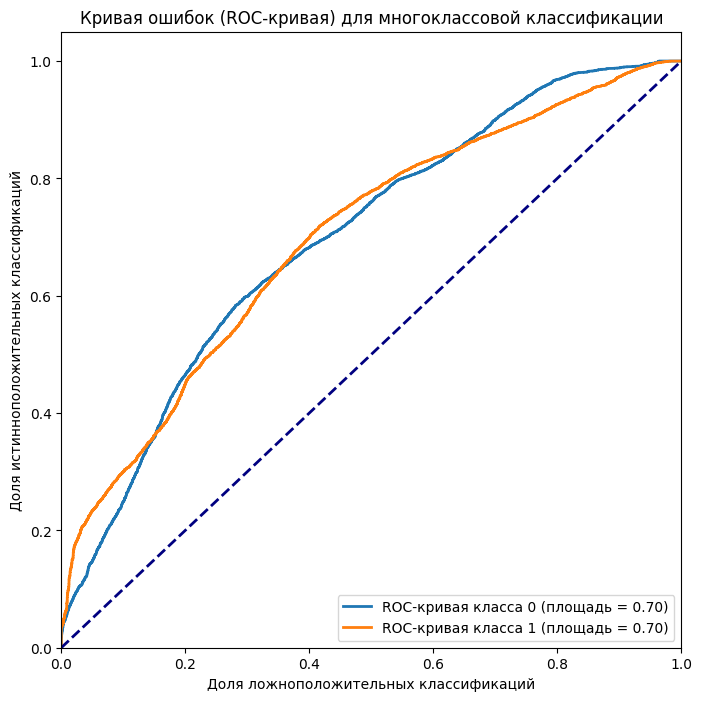

In [35]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):  
    fpr[i], tpr[i], _ = roc_curve(y_test == i, logistic_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 8))
for i in range(2):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC-кривая класса {0} (площадь = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных классификаций')
plt.ylabel('Доля истинноположительных классификаций')
plt.title('Кривая ошибок (ROC-кривая) для многоклассовой классификации')
plt.legend(loc='lower right')
plt.show()

## Лабораторная работа 4

#### Задание 1

Провести классификацию найденного датасета, методами наивного Байеса  . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [36]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

**Наивный Байес** – это самый простой алгоритм, который можно применить к своим данным. Как следует из названия, этот алгоритм делает предположение, что все переменные в наборе данных "наивные", т.е. не коррелируют друг с другом.

In [41]:
naive_bayes_models = {
    'GaussianNB': GaussianNB(),
    #'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
}

param_grid = {
    'GaussianNB': {},
    #'MultinomialNB': {'alpha': [0.1, 0.5, 1.0]},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0], 'binarize': [0.0, 0.1, 0.2]},
}

In [42]:
# Выбор метрики для оценки моделей
scoring_metric = 'accuracy'

# Обучение и оценка моделей с использованием GridSearchCV
best_models = {}
for model_name, model in naive_bayes_models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], scoring=scoring_metric, cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
# Оценка наилучшей модели на тестовом наборе
best_model_name = max(best_models, key=lambda k: grid_search.cv_results_['mean_test_score'][grid_search.best_index_])
best_model = best_models[best_model_name]


# Вывод результатов
print(f"Лучшая модель: {best_model_name}")
print(f"Лучшие параметры: {grid_search.best_params_}")

Лучшая модель: GaussianNB
Лучшие параметры: {'alpha': 1.0, 'binarize': 0.2}


In [43]:
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели : {accuracy}')

print(classification_report(y_test, y_pred))

Точность модели : 0.6035696741444244
              precision    recall  f1-score   support

           0       0.54      0.69      0.61      5374
           1       0.69      0.53      0.60      6840

    accuracy                           0.60     12214
   macro avg       0.61      0.61      0.60     12214
weighted avg       0.62      0.60      0.60     12214



## Лабораторная работа 5

#### Задание 1

Провести классификацию найденного датасета, методами решающего дерева и случайного леса . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##### Метод решающего дерева

**Гиперпараметры :**

**max_depth:** Максимальная глубина дерева. Ограничивает количество уровней в дереве. Значение None позволяет узлам расширяться до тех пор, пока все листовые узлы не будут содержать минимальное количество выборок. 

**min_samples_split:** Минимальное количество выборок, необходимых для разделения внутреннего узла. Если количество выборок в узле меньше этого значения, узел не будет разделяться.

**min_samples_leaf:** Минимальное количество выборок, необходимых для существования листового узла. Это определяет, сколько выборок должно быть на каждом листе.

In [45]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [46]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [49]:
y_pred = grid.best_estimator_.predict(x_test)

print(f'Точность для решающего дерева : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Точность для решающего дерева : 0.9968888161126576
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



##### Метод случайного дерева

**Гиперпараметры :**

**n_estimators :** Количество деревьев в лесу. Большее количество деревьев может улучшить производительность, но с большими затратами на вычислительные ресурсы. 

**max_depth :** Максимальная глубина каждого дерева в лесу. Это ограничивает глубину каждого дерева в лесу, что помогает управлять переобучением. 

**min_samples_split :** Минимальное количество выборок, необходимых для разделения внутреннего узла дерева. Определяет, сколько выборок должно быть в узле, чтобы он был разделен.

**min_samples_leaf :** Минимальное количество выборок, необходимых для существования листового узла. Это определяет, сколько выборок должно быть на каждом листе дерева.

In [50]:
param_grid = {
    'n_estimators': range(2, 10),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 9}

In [56]:
y_pred = grid.best_estimator_.predict(x_test)

print(f'Точность для случайного дерева : {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Точность для случайного дерева : 0.9999181267398067
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



## Лабораторная работа 6

#### Задание 1

Провести классификацию найденного датасета, методами CatBoost . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [57]:
from catboost import CatBoostClassifier

**Гиперпараметры :**

**depth :** Этот параметр определяет глубину дерева. Увеличение значения этого параметра увеличивает сложность модели, что может привести к более точной подгонке к тренировочным данным, но также увеличивает риск переобучения.

**learning_rate :** Определяет скорость обучения модели. Этот параметр контролирует величину, на которую обновляются веса модели при каждой итерации. Более низкие значения могут способствовать стабильному обучению, но могут потребовать большего количества итераций для достижения оптимальной точности.

**l2_leaf_reg :** Этот параметр отвечает за коэффициент регуляризации L2 (Ridge). Он контролирует сложность модели, ограничивая веса и предотвращая переобучение. Большие значения могут уменьшить сложность модели, но могут также уменьшить её точность на тренировочных данных.

In [58]:
param_grid = {
    'depth': [1, 4, 7, 10],
    'learning_rate': [0.01, 0.1, 1],
    'l2_leaf_reg': [1, 3, 5, 9],
    'iterations': [100, 200,],
    'depth': [0, 3, 6],
    'loss_function': ['MultiClass', 'Logloss']
}

In [59]:
grid = GridSearchCV(CatBoostClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

0:	learn: 0.6321444	total: 194ms	remaining: 38.7s
1:	learn: 0.5952071	total: 218ms	remaining: 21.6s
2:	learn: 0.5589955	total: 243ms	remaining: 16s
3:	learn: 0.5267293	total: 264ms	remaining: 12.9s
4:	learn: 0.4875239	total: 281ms	remaining: 11s
5:	learn: 0.4541997	total: 296ms	remaining: 9.56s
6:	learn: 0.4297771	total: 312ms	remaining: 8.59s
7:	learn: 0.4007977	total: 329ms	remaining: 7.9s
8:	learn: 0.3834378	total: 346ms	remaining: 7.34s
9:	learn: 0.3671641	total: 372ms	remaining: 7.07s
10:	learn: 0.3520477	total: 389ms	remaining: 6.69s
11:	learn: 0.3319121	total: 403ms	remaining: 6.32s
12:	learn: 0.3120627	total: 418ms	remaining: 6.02s
13:	learn: 0.2963372	total: 433ms	remaining: 5.76s
14:	learn: 0.2813033	total: 452ms	remaining: 5.57s
15:	learn: 0.2715479	total: 468ms	remaining: 5.38s
16:	learn: 0.2610946	total: 487ms	remaining: 5.24s
17:	learn: 0.2488193	total: 504ms	remaining: 5.09s
18:	learn: 0.2435490	total: 519ms	remaining: 4.94s
19:	learn: 0.2347185	total: 539ms	remaining: 4

{'depth': 6,
 'iterations': 200,
 'l2_leaf_reg': 1,
 'learning_rate': 0.1,
 'loss_function': 'Logloss'}

In [60]:
model = CatBoostClassifier(**grid.best_params_, verbose=False)
model.fit(x_train, y_train) 

y_pred = model.predict(x_test)

print(f"Точность модели: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Точность модели: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

